In [45]:
# Comenzamos utilizando las bibliotecas 
import numpy as np
import scipy.linalg as la
from scipy import integrate, linalg
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from mpl_toolkits import mplot3d

Problema1.

Resuelva numéricamente primero el caso de un oscilador amortiguado caso sin forzamiento ($\zeta \neq 0, F_0=0$).

Suponga que: $m=1, k=9, x(0) &lt; 0, x'(0) = 0$.

Reproduzca una gráfica similar para los distintos casos de amortiguamiento $\zeta$:

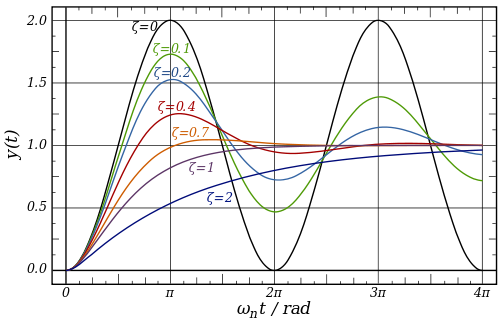

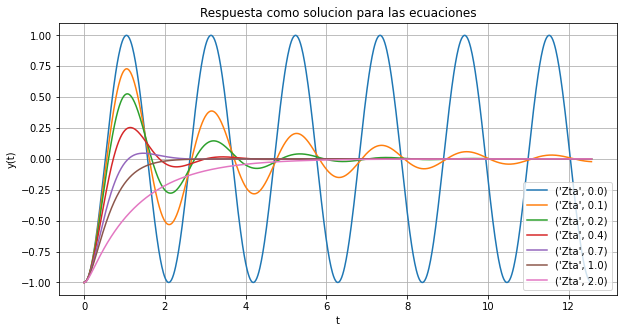

In [46]:
# Definimos el arreglo con el que trabajaremos
def exm2(y,t,agl,w0):
  x,v = y
  dydt =  [v,-2*agl*wn*v - x*wn**2]
  return dydt


#Declaramos las condiciones inicales
y0 = [-1.0,0.0]

# Tendremos un timepo de integracion 
# El cual ira de 0 a 12.56

t = np.linspace(0, 4*np.pi, 1000)

plt.figure(figsize=(10,5))

k = 9
m = 1
wn = np.sqrt(k/m)


zta = [0.0,0.1,0.2,0.4,0.7,1.0,2.0]

for agl in zta:
  # Usamos el método de integración de scipy.integrate.odeint
  y = odeint(exm2, y0, t, args=(agl,wn))

  plt.plot( t, y[:, 0], label=('Zta',agl))
  plt.legend(loc='best')
  plt.title('Respuesta como solucion para las ecuaciones')
  plt.xlabel('t')
  plt.ylabel('y(t)')  
  plt.grid()
plt.show()


Problema 2.

Resuelva numéricamente el caso de un oscilador forzado sin amortiguamiento ($\zeta = 0, F_0 \neq 0$).

Suponga que: $F_0=1, m=1, k=9, x(0) = 0, x'(0) = 0$.

Reproduzca una gráfica similar para los siguientes casos donde la frecuencia de forzamiento es: $\omega = 3, 3.1, 3.3, 3.5$

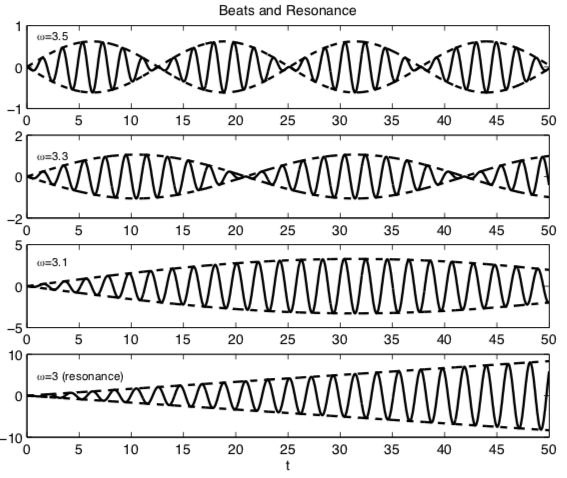

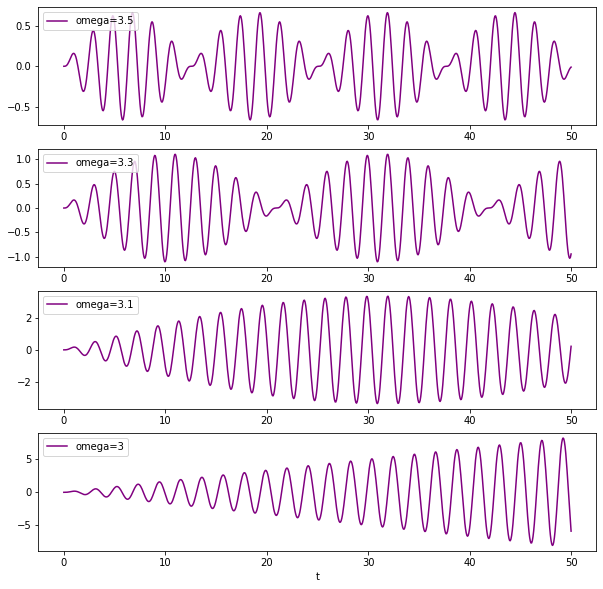

In [61]:

# Empezamos declarando las variables que utilizaremos 
zta=0
f0=1
m=1
k=9
wn=np.sqrt(k/m)
#Condiciones iniciales

y0=np.array([0,0])
t=np.linspace(0,50,760)

fig, axs=plt.subplots(4,sharex=False)
fig.set_size_inches(10,10)

for w,i in zip([3.5,3.3,3.1,3],[0,1,2,3]):
  Y, infodict = integrate.odeint(dxdt,y0,t,full_output=True)
  y , x = Y.T
  
  # Graficaremos las solucion 
  axs[i].plot(t,y,color='purple', label='omega='+str(w))
  axs[i].legend(loc='upper left')
plt.xlabel('t')
plt.show();



Problema 3.

Ahora resolvemos el caso completo de un oscilador amortiguado y forzado con una fuerza sinoidal ($\zeta \neq 0, F_0 \neq 0$)

Suponga un coeficiente de amortiguamiento $\zeta =0.1$.

Tome los mismos valores del problema anterior: $F=1, m=1, k=9, x(0) = 0, x'(0) = 0$.

Reproduzca una gráfica en el plano fase ($x,x'$), para las frecuencias de forzamiento: $\omega = 3, 3.1, 3.3, 3.5$, que muestre qué sucede con las soluciones del oscilador forzado en el caso amortiguado.

In [70]:
#Definimos las constantes del sistema
# Z con la que trabajaremos
z=0.1
# Masa
m = 1          
# Constante de amortiguamiento 
k = 9        
#Amplitud
F0=1
#Frecuencia angular natural del oscilador
omegaa = np.sqrt(k/m)
#Valores de omega proporcionados 
omega = [3,3.1,3.3,3.5]

#Definimos la función dx/dt para la solución del sistema
def f(y, t, omega):
  x, v = y
  sol = [v,np.sin(omega*t)-(omegaa**2)*x-2*z*omegaa*v]
  return sol

##Definimos las condiciones iniciales del sistema
#siendo x(0)=0
y0 = [0,0]



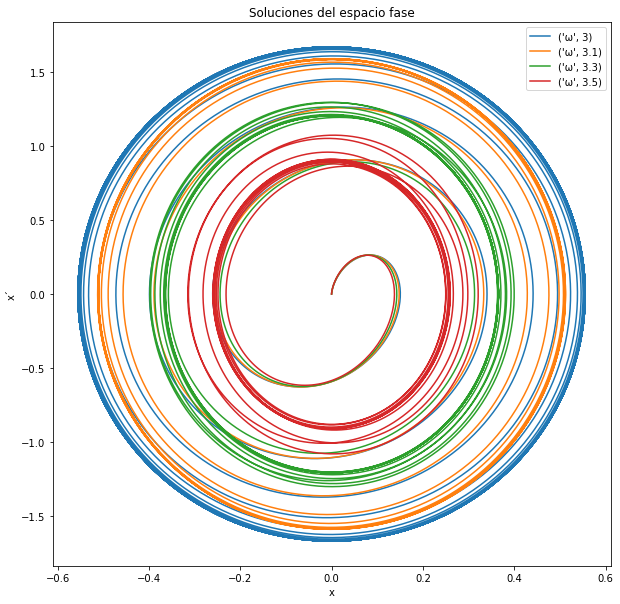

In [71]:
#Definimos los puntos de interés donde se desean determinar los valores de la solución
t = np.linspace(0,50,4200)
plt.figure(figsize=(10,10))

# Imprimimos el resultado en forma de grafica 
for tat in omega:
  y = odeint(f,y0,t, args= (tat,))
  plt.plot(y[:,0],y[:,1], label=('ω',tat))
plt.legend(loc='best')  
plt.ylabel('x´')
plt.xlabel('x')
plt.title('Soluciones del espacio fase')
plt.show()